In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,464350,0,0,Minezous,380,5,1,111.7,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...
1,464350,0,0,ein2015,574,7,1,133.8,"December 16, 2017",best javascript game
2,464350,0,0,76561198013878334,146,1,1,461.2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...
3,464350,4,0,nepocrates,483,24,1,27.0,"December 11, 2017",This is a geeks dream: Coding to play. My fri...
4,464350,11,18,woldsom,474,60,-1,86.8,"December 6, 2017","It's a good game, but while playing it gave me..."


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,111.7,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...
1,0,0,1,133.8,"December 16, 2017",best javascript game
2,0,0,1,461.2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...
3,4,0,1,27.0,"December 11, 2017",This is a geeks dream: Coding to play. My fri...
4,11,18,-1,86.8,"December 6, 2017","It's a good game, but while playing it gave me..."


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...,0,0,111.7,1
1,"December 16, 2017",best javascript game,0,0,133.8,1
2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...,0,0,461.2,1
3,"December 11, 2017",This is a geeks dream: Coding to play. My fri...,4,0,27.0,1
4,"December 6, 2017","It's a good game, but while playing it gave me...",11,18,86.8,-1
5,"December 4, 2017","Great concept, well executed!",1,1,213.9,1
6,"December 4, 2017","Worth getting past the first four hours of ""oh...",1,0,788.0,1
7,"December 3, 2017",It's the best RTS MMO I've ever played. Mostly...,2,0,59.3,1
8,"December 3, 2017",TL:DR; If you're interested in programming wit...,35,1,827.5,1
9,"December 2, 2017",Screeps is a really fun coding challenge!,0,0,48.7,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  934 non-null    object 
 1   Review_Text     933 non-null    object 
 2   Num_Helpful     934 non-null    int64  
 3   Num_Funny       934 non-null    int64  
 4   Hours_Played    934 non-null    float64
 5   Recommend       934 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 43.9+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18652/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...,0,0,111.7,1,1513814400
1,"December 16, 2017",best javascript game,0,0,133.8,1,1513382400
2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...,0,0,461.2,1,1513296000
3,"December 11, 2017",This is a geeks dream: Coding to play. My fri...,4,0,27.0,1,1512950400
4,"December 6, 2017","It's a good game, but while playing it gave me...",11,18,86.8,-1,1512518400


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18652/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...,0,0,111.7,1,1513814400,2503
1,"December 16, 2017",best javascript game,0,0,133.8,1,1513382400,2502
2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...,0,0,461.2,1,1513296000,2502
3,"December 11, 2017",This is a geeks dream: Coding to play. My fri...,4,0,27.0,1,1512950400,2501
4,"December 6, 2017","It's a good game, but while playing it gave me...",11,18,86.8,-1,1512518400,2500


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...,0,0,111.7,1,1513814400,2503
1,"December 16, 2017",best javascript game,0,0,133.8,1,1513382400,2502
2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...,0,0,461.2,1,1513296000,2502
3,"December 11, 2017",This is a geeks dream: Coding to play. My fri...,4,0,27.0,1,1512950400,2501
4,"December 6, 2017","It's a good game, but while playing it gave me...",11,18,86.8,-1,1512518400,2500


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2503,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...
1,2502,"December 16, 2017",best javascript game
2,2502,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...
3,2501,"December 11, 2017",This is a geeks dream: Coding to play. My fri...
4,2500,"December 6, 2017","It's a good game, but while playing it gave me..."


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2424,"June 20, 2016",12
1,2424,"June 21, 2016",3
2,2424,"June 22, 2016",3
3,2425,"June 23, 2016",3
4,2425,"June 24, 2016",2
...,...,...,...
658,2703,"October 22, 2021",1
659,2703,"October 23, 2021",2
660,2704,"November 1, 2021",1
661,2704,"October 28, 2021",1


<AxesSubplot:>

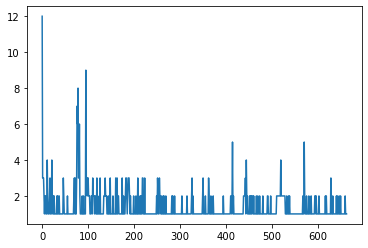

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

934

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.4087481146304677

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2424,18
1,2425,11
2,2426,10
3,2427,8
4,2428,9
...,...,...
250,2701,2
251,2702,1
252,2703,4
253,2704,2


<AxesSubplot:>

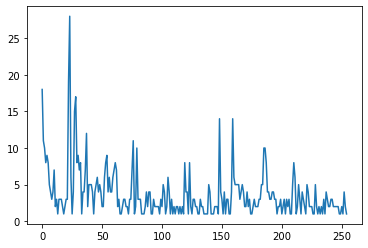

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

934

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

3.6627450980392156

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...,0,0,111.7,1,1513814400,2503
1,"December 16, 2017",best javascript game,0,0,133.8,1,1513382400,2502
2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...,0,0,461.2,1,1513296000,2502
3,"December 11, 2017",This is a geeks dream: Coding to play. My fri...,4,0,27.0,1,1512950400,2501
4,"December 6, 2017","It's a good game, but while playing it gave me...",11,18,86.8,-1,1512518400,2500


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2424,338
1,2425,535
2,2426,43
3,2427,94
4,2428,66
...,...,...
250,2701,1
251,2702,0
252,2703,0
253,2704,1


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2424,104,1,5.0,18.777778
2425,470,0,3.0,48.636364
2426,33,0,0.0,4.300000
2427,88,0,0.0,11.750000
2428,36,0,0.0,7.333333
...,...,...,...,...
2701,1,0,0.5,0.500000
2702,0,0,0.0,0.000000
2703,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

5560

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

5.95289079229122

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2424,24
1,2425,727
2,2426,1
3,2427,92
4,2428,50
...,...,...
250,2701,0
251,2702,0
252,2703,0
253,2704,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2424,7,0,0.0,1.333333
2425,701,0,1.0,66.090909
2426,1,0,0.0,0.100000
2427,91,0,0.0,11.500000
2428,45,0,0.0,5.555556
...,...,...,...,...
2701,0,0,0.0,0.000000
2702,0,0,0.0,0.000000
2703,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

2711

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

2.9025695931477515

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2424,2168.0
1,2425,1240.3
2,2426,1088.2
3,2427,1582.8
4,2428,1953.4
...,...,...
250,2701,253.4
251,2702,5.6
252,2703,521.8
253,2704,119.2


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2424,649.3,2.8,58.80,120.444444
2425,324.7,0.1,85.50,112.754545
2426,305.7,5.2,48.30,108.820000
2427,719.6,17.4,124.65,197.850000
2428,910.3,2.1,125.30,217.044444
...,...,...,...,...
2701,178.6,74.8,126.70,126.700000
2702,5.6,5.6,5.60,5.600000
2703,452.7,3.2,32.95,130.450000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

179718.5

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

192.41809421841526

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2424,1.000000
1,2425,1.000000
2,2426,0.800000
3,2427,1.000000
4,2428,0.777778
...,...,...
250,2701,1.000000
251,2702,1.000000
252,2703,1.000000
253,2704,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2424,1,1,1.0,1.000000
2425,1,1,1.0,1.000000
2426,1,-1,1.0,0.800000
2427,1,1,1.0,1.000000
2428,1,-1,1.0,0.777778
...,...,...,...,...
2701,1,1,1.0,1.000000
2702,1,1,1.0,1.000000
2703,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

738

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.7901498929336188

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...,0,0,111.7,1,1513814400,2503
1,"December 16, 2017",best javascript game,0,0,133.8,1,1513382400,2502
2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...,0,0,461.2,1,1513296000,2502
3,"December 11, 2017",This is a geeks dream: Coding to play. My fri...,4,0,27.0,1,1512950400,2501
4,"December 6, 2017","It's a good game, but while playing it gave me...",11,18,86.8,-1,1512518400,2500


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 21, 2017",this ♥♥♥♥ is addicting... there is always some...,0,0,0.112682,1.0,0.279674,2503
1,"December 16, 2017",best javascript game,0,0,0.134996,1.0,0.277127,2502
2,"December 15, 2017",I enjoy screeps immensely. I enjoy coding and ...,0,0,0.465569,1.0,0.276617,2502
3,"December 11, 2017",This is a geeks dream: Coding to play. My fri...,4,0,0.027161,1.0,0.274580,2501
4,"December 6, 2017","It's a good game, but while playing it gave me...",11,18,0.087540,0.0,0.272033,2500
...,...,...,...,...,...,...,...,...
929,"May 18, 2020",This game is NOT open source and is falsely ad...,6,0,0.000101,0.0,0.727458,2628
930,"May 15, 2020",This is a real fun and stimulating way of lear...,0,0,0.706886,1.0,0.725930,2628
931,"May 14, 2020","The game is very buggy, but it still has value...",0,0,0.902666,1.0,0.725420,2628
932,"April 28, 2020","not bad, not bad",0,0,0.033825,1.0,0.717269,2625


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18652/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 4, 2021","It's nice and fun to get into, but it's got th...",0,0,0.001716,1.0,1.000000,2705
1,"November 1, 2021",If(javaScript.isFun(you)){ const buy = this...,1,0,0.085521,1.0,0.998472,2704
2,"October 28, 2021","Look, I like programming, okay? Also, as a com...",0,0,0.034632,1.0,0.996434,2704
3,"October 23, 2021",The perfect game to keep your skills sharp or ...,0,0,0.456987,1.0,0.993887,2703
4,"October 23, 2021",Excelent game for learning situational and aut...,0,0,0.055028,1.0,0.993887,2703
5,"October 22, 2021",very fun but also educating. TRY NOW!,0,0,0.011309,1.0,0.993377,2703
6,"October 21, 2021",if only I was smart enough to play this,0,0,0.003130,1.0,0.992868,2703
7,"October 20, 2021",easy to get into (with programming experience)...,0,0,0.005553,1.0,0.992359,2702
8,"October 11, 2021","I like the idea. I like the challenge. Still, ...",1,0,0.180230,1.0,0.987774,2701
9,"October 8, 2021","fun, i write eveything in purescript then comp...",0,0,0.075424,1.0,0.986246,2701


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2424    [Great game., Perfect.I love you., This is abs...
2425    [This game is the heaven for every programmer....
2426    [The game itself is great idea, but in reality...
2427    [If you hesitate to buy the game, I suggest to...
2428    [I really like Screeps. A game you play almost...
2429    [I'm very much a fan of this addictive game. I...
2430    [As the description of the game says, it's a g...
2431    [Mom's spaghetti code, Addictive I am recomedn...
2432    [Well made, fun programming game! The web inte...
2433    ["I want to like this game..."Screw those revi...
2434    [Just fended off an attack and then counter at...
2435    [I am now a robot., Excellent Game!Screeps is ...
2436    [Built up for a week only to get demolished ov...
2437    [As programmer I can say, that this game is sp...
2438    [Alright I've got a nice little base set-up ov...
2439    [this is literally the best game ive ever play...
2440    [Good game concept. Needs more rooms. No 2 res..

In [52]:
# storing data in JSON format
df_text_list.to_json('screeps_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('screeps_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2424  [Great game., Perfect.I love you., This is abs...
1    Review_Text   2425  [This game is the heaven for every programmer....
2    Review_Text   2426  [The game itself is great idea, but in reality...
3    Review_Text   2427  [If you hesitate to buy the game, I suggest to...
4    Review_Text   2428  [I really like Screeps. A game you play almost...
5    Review_Text   2429  [I'm very much a fan of this addictive game. I...
6    Review_Text   2430  [As the description of the game says, it's a g...
7    Review_Text   2431  [Mom's spaghetti code, Addictive I am recomedn...
8    Review_Text   2432  [Well made, fun programming game! The web inte...
9    Review_Text   2433  ["I want to like this game..."Screw those revi...
10   Review_Text   2434  [Just fended off an attack and then counter at...
11   Review_Text   2435  [I am now a robot., Excellent Game!Screeps is ...
12   Review_Text   2436  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('screeps_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18652/1472943556.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('screeps_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18652/3106531501.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('screeps_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])